# Initial example 

## example 1
Three alminium plate connected thermal condactance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chill import Chill
from chill.constants import *

In [2]:
c = Chill()

In [3]:
c.define_object?

Signature:
c.define_object(
    material_name,
    temperature,
    volume,
    pressure=101325.0,
    name='',
)
Docstring:
Defines a thermal node representing a specific object with given material properties.

Args:
    material_name (str): The name of the material (must be supported by the `thermo` library).
    temperature (float): Initial temperature of the object.
    volume (float): Volume of the object, used to calculate its specific heat capacity.
    pressure (float, optional): Pressure of the system. Defaults to standard atmospheric pressure.
    name (str): The name used for the node name

Returns:
    None
File:      ~/chill/chill/core.py
Type:      method


In [4]:
c.define_thermal_conduction?

Signature:
c.define_thermal_conduction(
    node0: chill.core.Node,
    node1: chill.core.Node,
    conductance: float,
    name: str = '',
) -> None
Docstring:
Defines a thermal conduction edge between two nodes.

Args:
    node0 (Node): One end of the conduction edge.
    node1 (Node): The other end of the conduction edge.
    conductance (float): Thermal conductance.
    name (str, optional): Name of the edge. Defaults to an empty string.
File:      ~/chill/chill/core.py
Type:      method


In [5]:
object0 = c.define_object("Al", 300*K, volume=10.*cm3)
object1 = c.define_object("Al", 300*K, volume=10.*cm3)
object2 = c.define_object("Al", 500*K, volume=10.*cm3)

h_c = 100
area = 10.*cm2
heat_resistance = 1 / (h_c * area)
c.define_thermal_conduction(object0, object1, heat_resistance)
c.define_thermal_conduction(object1, object2, heat_resistance)

In [6]:
c.setup()

In [7]:
c.execute?

Signature: c.execute(total_time: float, record_interval: float = 0) -> None
Docstring:
execute the simulation for a specified time.
:param total_time: simulation time
:param record_interval: recording interval
File:      ~/chill/chill/core.py
Type:      method


In [8]:
%%time
c.execute(5000, 1)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 350653.27it/s]

CPU times: user 20.6 ms, sys: 32.2 ms, total: 52.8 ms
Wall time: 4.22 s


In [9]:
temp = np.array(c.temperatures_history)
time = np.array(c.times_history)

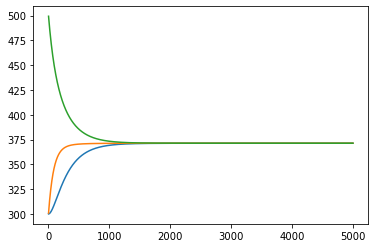

In [10]:
plt.plot(time, temp[:,0])
plt.plot(time, temp[:,1])
plt.plot(time, temp[:,2])

# example 2
Define heater and radiator 

In [11]:
plate = c.define_node?

Signature: c.define_node(temperature: float, capacity: float, name: str = '') -> chill.core.Node
Docstring:
Defines a new node and adds it to the simulation.

Args:
    temperature (float): Initial temperature of the node [K].
    capacity (float): Thermal capacity of the node [K/J].
    name (str, optional): Name of the node. Defaults to an empty string.

Returns:
    Node: The created node object.
File:      ~/chill/chill/core.py
Type:      method


In [12]:
c.define_heater?

Signature: c.define_heater(target_node, heat_input)
Docstring:
Defines a heater connected to the specified target node, simulating a constant heat input.

Args:
    target_node (Node): The node to which the heater is connected.
    heat_input (float): The amount of heat input provided by the heater.

Returns:
    Node : The created node object (heater).
File:      ~/chill/chill/core.py
Type:      method


In [13]:
c = Chill()
plate = c.define_object("Fe", temperature=300*K, volume=10*cm3, name='plate')
radiator = c.define_object("Cu", temperature=300*K, volume=10*cm3, name='radiator')
ambient = c.define_node(temperature=300, capacity=np.inf, name='ambient')

c.define_thermal_conduction(plate, radiator, R)
E_G, epsilon = 1., 1.
c.define_thermal_radiation(radiator, ambient, E_G*epsilon*sigma*area)

c.define_heater(plate, 10*W)
c.setup()

In [14]:
%%time
c.execute(100000, 100)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 28064.56it/s]

CPU times: user 90.2 ms, sys: 20.2 ms, total: 110 ms
Wall time: 37.8 ms


Text(0, 0.5, 'Temperature [K]')

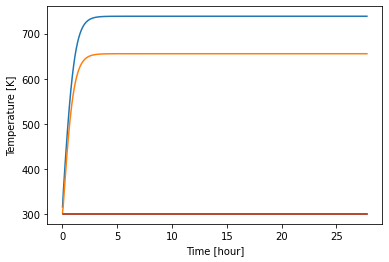

In [15]:
temp = np.array(c.temperatures_history)
time = np.array(c.times_history) / 60. /60
plt.plot(time, temp[:, 0])
plt.plot(time, temp[:, 1])
plt.plot(time, temp[:, 2])
plt.plot(time, temp[:, 3])
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [16]:
c.define_node?

Signature: c.define_node(temperature: float, capacity: float, name: str = '') -> chill.core.Node
Docstring:
Defines a new node and adds it to the simulation.

Args:
    temperature (float): Initial temperature of the node [K].
    capacity (float): Thermal capacity of the node [K/J].
    name (str, optional): Name of the node. Defaults to an empty string.

Returns:
    Node: The created node object.
File:      ~/chill/chill/core.py
Type:      method


In [17]:
c.define_thermal_radiation?

Signature:
c.define_thermal_radiation(
    node0: chill.core.Node,
    node1: chill.core.Node,
    constant: float,
    name: str = '',
) -> None
Docstring:
Defines a thermal radiation edge between two nodes.

Args:
    node0 (Node): One end of the radiation edge.
    node1 (Node): The other end of the radiation edge.
    constant (float): Radiation constant.
    name (str, optional): Name of the edge. Defaults to an empty string.
File:      ~/chill/chill/core.py
Type:      method


# example 3

Relatively-large model

In [18]:
%%time

c = Chill()
c.dt = 0.1

# Alminium - definition
rho = 2700 * kg/m3
c_p = 900  *J_per_kgK
A = 0.01 * m2 
h = 0.01 * m
C = rho * A * h * c_p # J/K
h_c = 22000
R = 1/(A*h_c)

m, n = 100, 100
nodes = [[c.define_node(temperature=300, capacity=C, name=f'{i:08}-{j:08}') for i in range(m)] for j in range(n)]

pair_list = \
[((i, j), (i, j + 1)) for i in range(n) for j in range(m - 1)] + \
[((i, j), (i + 1, j)) for i in range(n - 1) for j in range(m)]
[c.define_thermal_conduction(nodes[i1][j1], nodes[i2][j2], R) for ((i1, j1), (i2, j2)) in pair_list]

ambient = c.define_node(temperature=300, capacity=np.inf, name='ambient')
rad_const = E_G*epsilon*sigma*A
[c.define_thermal_radiation(node, ambient, rad_const) for node_sub in nodes for node in node_sub]

heater = c.define_node(temperature=300, capacity=np.inf, name='heater')
c.define_thermal_input(heater, nodes[50][50], 100, 'input')

c.setup()

CPU times: user 350 ms, sys: 59 ms, total: 409 ms
Wall time: 180 ms


In [19]:
%%time
c.execute(10, 1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 282.42it/s]

CPU times: user 28.6 ms, sys: 8.23 ms, total: 36.8 ms
Wall time: 37.8 ms


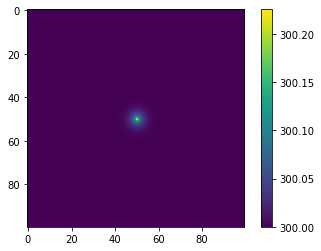

In [20]:
temp = np.array(c.temperatures_history)
time = np.array(c.times_history) / 60. /60
plt.imshow(temp[-1,:10000].reshape(m, n))
plt.colorbar()

Text(0, 0.5, 'Temperature [K]')

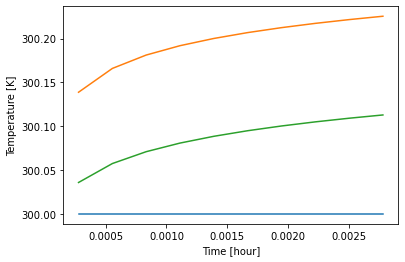

In [21]:
temp = np.array(c.temperatures_history)
time = np.array(c.times_history) / 60. /60
plt.plot(time, temp[:, 0])
plt.plot(time, temp[:, 5050])
plt.plot(time, temp[:, 5049])
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [22]:
%%time
c.execute(40000, 400)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:56<00:00,  1.17s/it]

CPU times: user 1min 43s, sys: 13.4 s, total: 1min 56s
Wall time: 1min 56s


Text(0, 0.5, 'Temperature [K]')

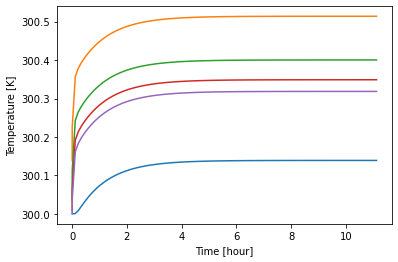

In [23]:
temp = np.array(c.temperatures_history)
time = np.array(c.times_history) / 60. /60
plt.plot(time, temp[:, 0])
plt.plot(time, temp[:, 5050])
plt.plot(time, temp[:, 5049])
plt.plot(time, temp[:, 5048])
plt.plot(time, temp[:, 5047])
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

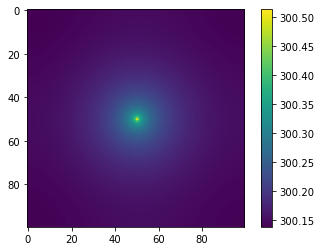

In [24]:
plt.imshow(temp[-1,:10000].reshape(m, n))
plt.colorbar()